In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import matrix_rank, inv
from pprint import pprint
import sys
import os
current_notebook_dir = os.getcwd()
# Replace with the path to your IT_PI.py function
project_root_dir = os.path.join(current_notebook_dir, '..', '..')
it_pi_module_dir = project_root_dir
sys.path.append(it_pi_module_dir)
import IT_PI
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering/', VIEW.as_view(), name=''),

In [2]:
# Load dataset
dataset = np.loadtxt('dataset-GS1-GS10.txt').T
rows_with_nan = np.isnan(dataset).any(axis=1)
data = dataset[~rows_with_nan, :]
Tw = 0.6756;
data[:,0] = data[:,0]-data[:,23];
data[18460:, 20] += 59  # Adjusting for 0-based indexing in Python
idy = (data[:, 0] > 0.02) & (data[:, 0] < 0.15)
data = data[idy, :]
idT = (data[:, 2] - Tw > 0)
data = data[idT, :]
condition = (data[:, 21] == 4) & (data[:, 22] == 4000)

data = data[~condition]
print('data size: ',data.shape)
input_data = np.column_stack((data[:, 0], data[:, 1], data[:, 3], data[:, 2] , np.full_like(data[:,1], Tw), data[:, 4],
                              data[:, 7], data[:, 6], data[:, 11], data[:, 12], data[:, 15]))
output_tauw = data[:, 18] * data[:, 0] / data[:, 4] / data[:, 1]
output_qw = data[:, 19] * data[:, 0] / (data[:, 2] - Tw) / data[:, 7]
index = data[:, 20]
print('input size ', input_data.shape)

num_input = 2

data size:  (2692, 24)
input size  (2692, 11)


In [3]:
# Define D_in matrix
D_in = np.matrix('1, 1, -3, 0, 0, -1, 1, 2, 1, 1, 0;0, -1, 0, 0,0, -1, -3, -2, 0, 0, 0; 0, 0, 1, 0,0, 1, 1, 0, 0, 0, 0; 0, 0, 0, 1, 1,0, -1, -1, 0, 0, 0')
print("D_in matrix:\n", D_in)
num_rows   = np.shape(D_in)[0]
num_cols   = np.shape(D_in)[1]
# Generate basis matrices
num_basis      = D_in.shape[1]-matrix_rank(D_in)
basis_matrices = IT_PI.calc_basis(D_in, num_basis)
print("Basis vectors:")
pprint(basis_matrices)
num_input = 2

D_in matrix:
 [[ 1  1 -3  0  0 -1  1  2  1  1  0]
 [ 0 -1  0  0  0 -1 -3 -2  0  0  0]
 [ 0  0  1  0  0  1  1  0  0  0  0]
 [ 0  0  0  1  1  0 -1 -1  0  0  0]]
Basis vectors:
matrix([[ 0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  3.,  1., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  2.,  0., -1.,  0.,  0.,  0., -1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.]])


In [4]:
# Run dimensionless learning for qw
results_qw = IT_PI.main(
    input_data,
    output_qw.reshape(-1,1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 20},
    seed=329025
)

------------------------------------------------------------
num of parameters: 14

Using estimator: 'binning' with hyperparameters: {'num_bins': 20}

(150_w,300)-aCMA-ES (mu_w=78.0,w_1=3%) in dimension 14 (seed=329025, Mon Jul 28 12:59:18 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    300 -1.664455243911974e+00 1.0e+00 5.47e-01  5e-01  6e-01 0:00.3
    2    600 -1.648842438931871e+00 1.5e+00 5.70e-01  5e-01  6e-01 0:00.7
    3    900 -1.641441033744057e+00 2.0e+00 6.03e-01  5e-01  7e-01 0:01.0
   12   3600 -1.817496090312545e+00 6.5e+00 6.77e-01  2e-01  6e-01 0:04.1
   23   6900 -2.030730255982394e+00 1.7e+01 7.69e-01  1e-01  6e-01 0:08.3
   37  11100 -2.067946178181913e+00 1.0e+02 8.33e-01  3e-02  5e-01 0:13.4
   54  16200 -2.097717864179651e+00 2.1e+02 1.02e+00  1e-02  4e-01 0:19.7
   74  22200 -2.120827470215756e+00 5.7e+02 1.07e+00  3e-03  3e-01 0:26.8
   98  29400 -2.127572898847792e+00 3.9e+03 1.27e+00  7e-04  3e-01 0:35.1
  100  30000 -2.

In [5]:
# Run dimensionless learning for qw
results_tauw = IT_PI.main(
    input_data,
    output_tauw.reshape(-1,1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 20},
    seed=320795
)

------------------------------------------------------------
num of parameters: 14

Using estimator: 'binning' with hyperparameters: {'num_bins': 20}

(150_w,300)-aCMA-ES (mu_w=78.0,w_1=3%) in dimension 14 (seed=320795, Mon Jul 28 13:00:16 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    300 -1.381115561417125e+00 1.0e+00 5.53e-01  5e-01  6e-01 0:00.3
    2    600 -1.501941700889280e+00 1.6e+00 5.80e-01  5e-01  6e-01 0:00.7
    3    900 -1.577692953356605e+00 2.0e+00 5.97e-01  5e-01  7e-01 0:01.1
   12   3600 -1.628627068143460e+00 8.9e+00 7.83e-01  4e-01  7e-01 0:04.3
   24   7200 -1.848952369825113e+00 3.4e+01 9.08e-01  1e-01  7e-01 0:08.5
   39  11700 -1.927881914736931e+00 1.1e+02 1.10e+00  5e-02  6e-01 0:13.7
   57  17100 -1.948646124114421e+00 4.1e+02 1.12e+00  1e-02  5e-01 0:19.9
   78  23400 -1.965193767933004e+00 1.4e+03 1.23e+00  4e-03  4e-01 0:27.2
  100  30000 -1.978199978874425e+00 4.3e+03 1.59e+00  9e-04  4e-01 0:34.9
  126  37800 -1.

In [6]:
# Extract and process a_list for output_tauw
a_list_tauw = results_tauw['input_coef_basis']
omega_tauw = []
for a in a_list_tauw:
    max_abs_value = np.max(np.abs(a))
    normalized_a = a / max_abs_value
    rounded_normalized_a = np.round(normalized_a, 2)
    coef_pi              = np.dot(rounded_normalized_a,basis_matrices)
    omega_tauw.append(np.round(coef_pi[0],2))
for i, normalized_coef_pi in enumerate(omega_tauw):
    print(f'coef_pi_tauw{i + 1}', normalized_coef_pi)

input_tauw_list = [IT_PI.calc_pi_omega(np.array(omega), input_data) for omega in omega_tauw]
input_tauw = np.column_stack(input_tauw_list)

a_list_qw = results_qw['input_coef_basis']

omega_qw = []
for a in a_list_qw:
    max_abs_value = np.max(np.abs(a))
    normalized_a = a / max_abs_value
    rounded_normalized_a = np.round(normalized_a, 2)
    coef_pi              = np.dot(rounded_normalized_a,basis_matrices)
    omega_qw.append(np.round(coef_pi[0],2))

for i, normalized_coef_pi in enumerate(omega_qw):
    print(f'coef_pi_qw{i + 1}', normalized_coef_pi)

input_qw_list = [IT_PI.calc_pi_omega(np.array(omega), input_data) for omega in omega_qw]
input_qw = np.column_stack(input_qw_list)


coef_pi_tauw1 [[-0.08  0.19  0.13 -0.38  0.35  0.15 -0.28  0.25  1.   -0.79  0.12]]
coef_pi_tauw2 [[ 0.18  0.48  0.5   0.37 -0.36 -0.77  0.27 -0.26 -0.68  1.    0.13]]
coef_pi_qw1 [[-0.12  0.67  0.51 -0.76  0.68 -1.    0.49 -0.57  0.66 -0.03  0.16]]
coef_pi_qw2 [[ 0.39  0.31  0.39  0.34 -0.3  -0.57  0.18 -0.14 -1.    1.   -0.03]]


In [11]:
omega_tauw = np.squeeze(omega_tauw)
omega_qw = np.squeeze(omega_qw)
basis_matrices_new = np.array([
    [0,     0,     0,     1,    -1,     0,     0,     0,     0,     0,    0],
    [1,     1,     1,     0,     0,    -1,     0,     0,     0,     0,    0],
    [0,     1,     0,  -0.5,     0,     0,     0,  -0.5,     0,     0,    0],
    [0,     0,     0,     0,     0,     1,    -1,     1,     0,     0,    0],
    [1,     0,     0,     0,     0,     0,     0,     0,    -1,     0,    0],
    [1,     0,     0,     0,     0,     0,     0,     0,     0,    -1,    0],
    [0,     0,     0,     0,     0,     0,     0,     0,     0,     0,    1]
])

basis_matrices_new_T = basis_matrices_new.T
gamma_tauw, _, _, _ = np.linalg.lstsq(basis_matrices_new_T, omega_tauw.T, rcond=None)
gamma_tauw = np.array(gamma_tauw.T)
gamma_tauw = np.round(gamma_tauw, 1)

gamma_qw, _, _, _ = np.linalg.lstsq(basis_matrices_new_T, omega_qw.T, rcond=None)
gamma_qw = np.array(gamma_qw.T)
gamma_qw = np.round(gamma_qw, 1)
variables_tauw = ['{(T/T_w)}', 'Re', 'M', 'Pr', '{(y/k_{rms})}', '{(y/Ra)}', 'ES']
variables_qw = ['{(T/T_w)}', 'Re', 'M', 'Pr', '{(y/k_{rms})}', '{(y/Ra)}', 'ES']
tauw_lab = IT_PI.create_labels(gamma_tauw, variables_tauw)
qw_lab = IT_PI.create_labels(gamma_qw, variables_qw)

# Print the labels
for j, label in enumerate(tauw_lab):
    print(f'tauw_lab[{j}] = {label}')
for j, label in enumerate(qw_lab):
    print(f'qw_lab[{j}] = {label}')


tauw_lab[0] = $\frac{Re^{0.1} \cdot M^{0.1} \cdot Pr^{0.3} \cdot {(y/Ra)}^{0.8} \cdot ES^{0.1}}{{(T/T_w)}^{0.4} \cdot {(y/k_{rms})}^{1.0}}$
tauw_lab[1] = $\frac{{(T/T_w)}^{0.4} \cdot Re^{0.5} \cdot {(y/k_{rms})}^{0.7} \cdot ES^{0.1}}{Pr^{0.3} \cdot {(y/Ra)}^{1.0}}$
qw_lab[0] = $\frac{Re^{0.5} \cdot M^{0.2} \cdot ES^{0.2}}{{(T/T_w)}^{0.7} \cdot Pr^{0.5} \cdot {(y/k_{rms})}^{0.7}}$
qw_lab[1] = $\frac{{(T/T_w)}^{0.3} \cdot Re^{0.4} \cdot {(y/k_{rms})}^{1.0}}{M^{0.1} \cdot Pr^{0.2} \cdot {(y/Ra)}^{1.0}}$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


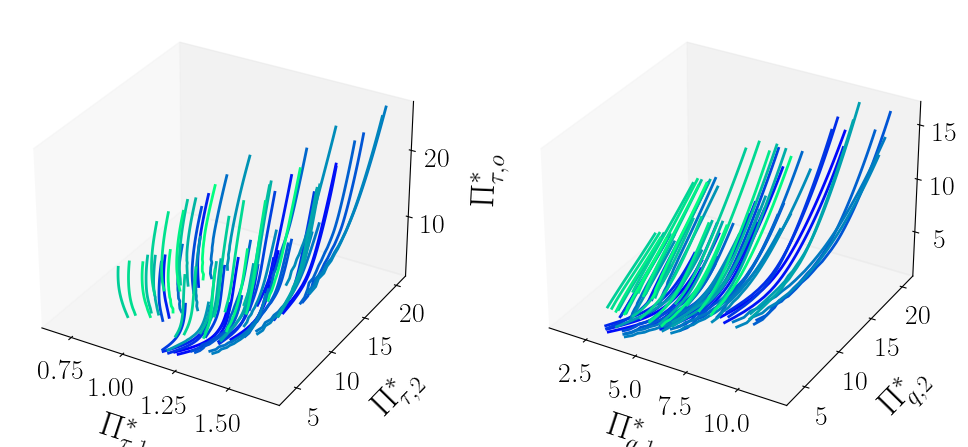

In [8]:
def plot_data_subfigures(input_data1, output_data1,
                         input_data2, output_data2,  filename_base):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})  
    #plt.subplots_adjust(wspace=0.1)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['text.usetex'] = True  

    for i, id in enumerate(ids):
        id_mask = (index == id)
        ax1.plot(input_data1[id_mask, 0], input_data1[id_mask, 1], output_data1[id_mask], 
                 color=colors[i], linewidth=2)
    #ax1.set_xlabel(labels1[0], fontsize=20, labelpad=20)
    #ax1.set_ylabel(labels1[1], fontsize=20, labelpad=20)
    #ax1.set_zlabel(zlabel1, fontsize=20, labelpad=15)

    ax1.set_xlabel(r'$\Pi_{\tau,1}^*$', fontsize=25, labelpad=15)
    ax1.set_ylabel(r'$\Pi_{\tau,2}^*$', fontsize=25, labelpad=15)
    ax1.set_zlabel(r'$\Pi_{\tau, o}^*$', fontsize=25, labelpad=15)

    ax1.xaxis.set_tick_params(width=1, labelsize=20)
    ax1.yaxis.set_tick_params(width=1, labelsize=20)
    ax1.zaxis.set_tick_params(width=1, labelsize=20)
    ax1.grid(False)

    for i, id in enumerate(ids):
        id_mask = (index == id)
        ax2.plot(input_data2[id_mask, 0], input_data2[id_mask, 1], output_data2[id_mask], 
                 color=colors[i], linewidth=2)
    #ax2.set_xlabel(labels2[0], fontsize=20, labelpad=20)
    #ax2.set_ylabel(labels2[1], fontsize=20, labelpad=20)
    #ax2.set_zlabel(zlabel2, fontsize=20, labelpad=15)

    ax2.set_xlabel(r'$\Pi_{q,1}^*$', fontsize=25, labelpad=15)
    ax2.set_ylabel(r'$\Pi_{q,2}^*$', fontsize=25, labelpad=15)
    ax2.set_zlabel(r'$\Pi_{q, o}^*$', fontsize=25, labelpad=15)
    ax2.xaxis.set_tick_params(width=1, labelsize=20)
    ax2.yaxis.set_tick_params(width=1, labelsize=20)
    ax2.zaxis.set_tick_params(width=1, labelsize=20)
    ax2.grid(False)

    # Save the figure in both EPS and PNG formats
    plt.savefig(f"{filename_base}.eps", dpi=300,  transparent = 'True')
    #plt.savefig(f"{filename_base}.png", dpi=300, bbox_inches='tight')
    plt.show()

ids = np.unique(index)
colors = plt.cm.winter(np.linspace(0, 1, len(ids)))
plot_data_subfigures(
    input_tauw, output_tauw, 
    input_qw, output_qw,
    'tauw_qw_dimensionless'
)


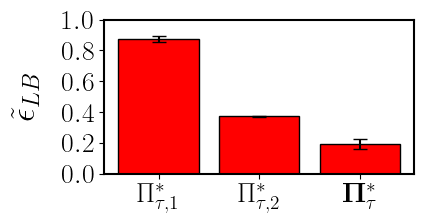

[0.8736879791815029, 0.3717754393838148, 0.19223599970481114]


In [9]:

#IT_PI.plot_error_bars(input_tauw, results_tauw["irreducible_error"],results_tauw["uncertainty"])

plt.figure(figsize=(4, 2))
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

x_labels = [r'$\Pi_{\tau,1}^*$', r'$\Pi_{\tau,2}^*$', r'$\mathbf{\Pi_{\tau}^*}$']

# Use uq_values as the error bars
plt.bar(x_labels, results_tauw["irreducible_error"], yerr=results_tauw["uncertainty"], capsize=5, edgecolor='black',color = 'red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$\tilde{\epsilon}_{L B}$', fontsize=25, labelpad=15)
plt.ylim([0, 1])
plt.savefig('WM_tauw_rank.eps', dpi=300, bbox_inches='tight',transparent = 'True')

plt.show()
print(results_tauw["irreducible_error"])


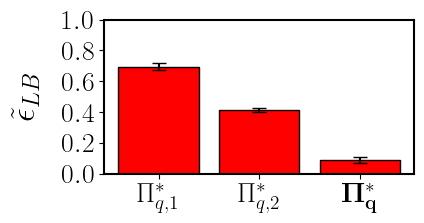

[0.6952802864582843, 0.4124961558105523, 0.08930223331600447]


In [10]:
#IT_PI.plot_error_bars(input_qw, results_qw["irreducible_error"],results_qw["uncertainty"])
plt.figure(figsize=(4, 2))
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

x_labels = [r'$\Pi_{q,1}^*$', r'$\Pi_{q,2}^*$', r'$\mathbf{\Pi_{q}^*}$']

# Use uq_values as the error bars
plt.bar(x_labels, results_qw["irreducible_error"], yerr=results_qw["uncertainty"], capsize=5, edgecolor='black',color = 'red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r'$\tilde{\epsilon}_{L B}$', fontsize=25, labelpad=15)
plt.ylim([0, 1])
plt.savefig('WM_qw_rank.eps', dpi=300, bbox_inches='tight',transparent = 'True')

plt.show()
print(results_qw["irreducible_error"])